In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

170498071/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

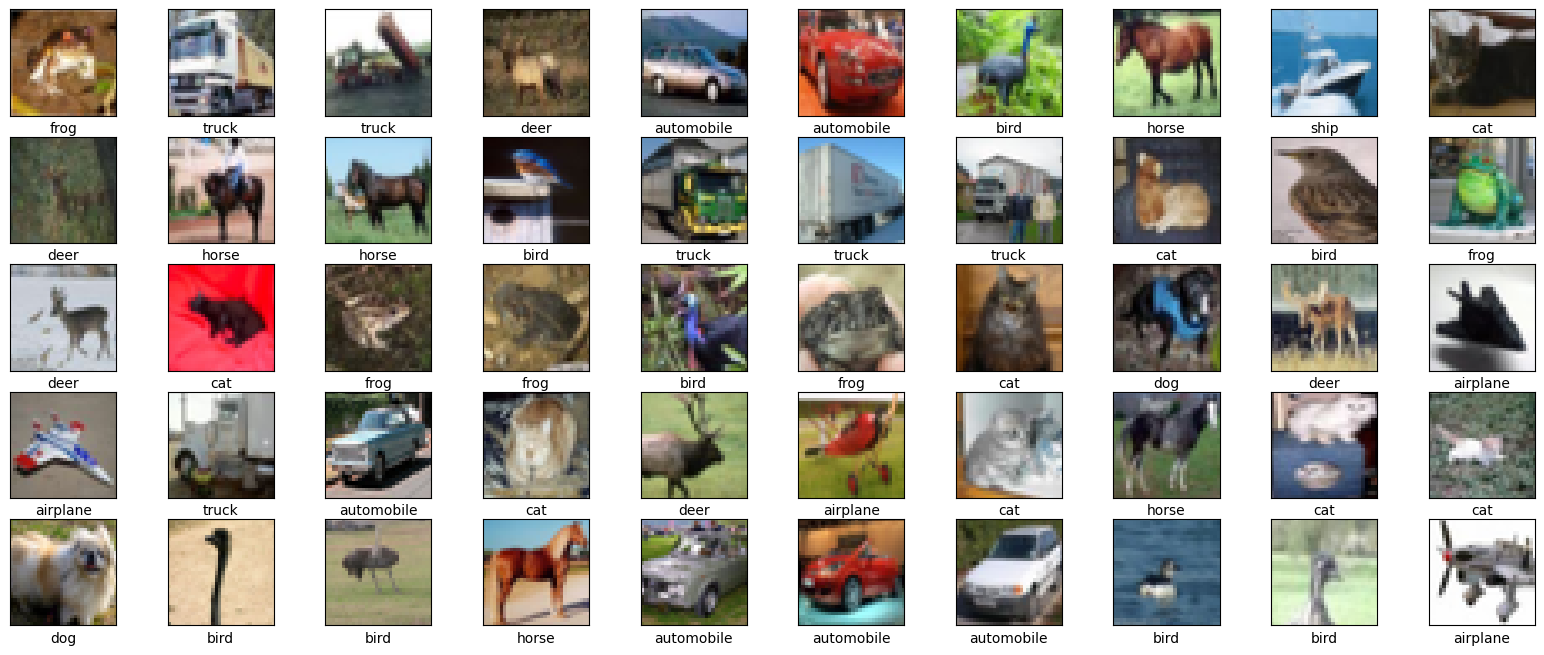

In [4]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [92]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1_l2

model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32, 32, 3)),

    ## hidden layers with L1_L2 regularization
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_regularizer=l1_l2(l1=0.0011, l2=0.001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),

    ## hidden layer with L1_L2 regularization
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_48 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_49 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                     

In [94]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [95]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_data = (X_test, Y_test) , batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 14s 7ms/step - loss: 2.8610 - accuracy: 0.4865 - val_loss: 2.5355 - val_accuracy: 0.4181
Epoch 2/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.7595 - accuracy: 0.5980 - val_loss: 1.7783 - val_accuracy: 0.5696
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5098 - accuracy: 0.6439 - val_loss: 2.1046 - val_accuracy: 0.4919
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4057 - accuracy: 0.6721 - val_loss: 1.5088 - val_accuracy: 0.6271
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3399 - accuracy: 0.6915 - val_loss: 1.4765 - val_accuracy: 0.6411


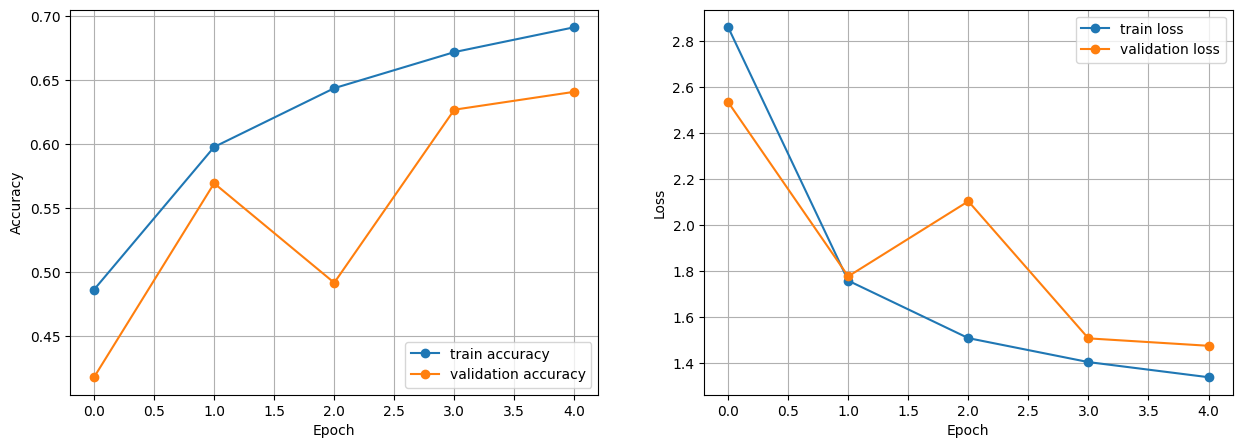

In [96]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [97]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 1.4765 - accuracy: 0.6411

Test Accuracy: 0.6410999894142151

Test Loss: 1.4765006303787231


In [98]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [99]:
predictions[0]

array([0.00233481, 0.00093657, 0.00392925, 0.7870958 , 0.00221065,
       0.19240339, 0.00405198, 0.00114071, 0.00170019, 0.00419673],
      dtype=float32)

In [100]:
np.argmax(predictions[0])

3

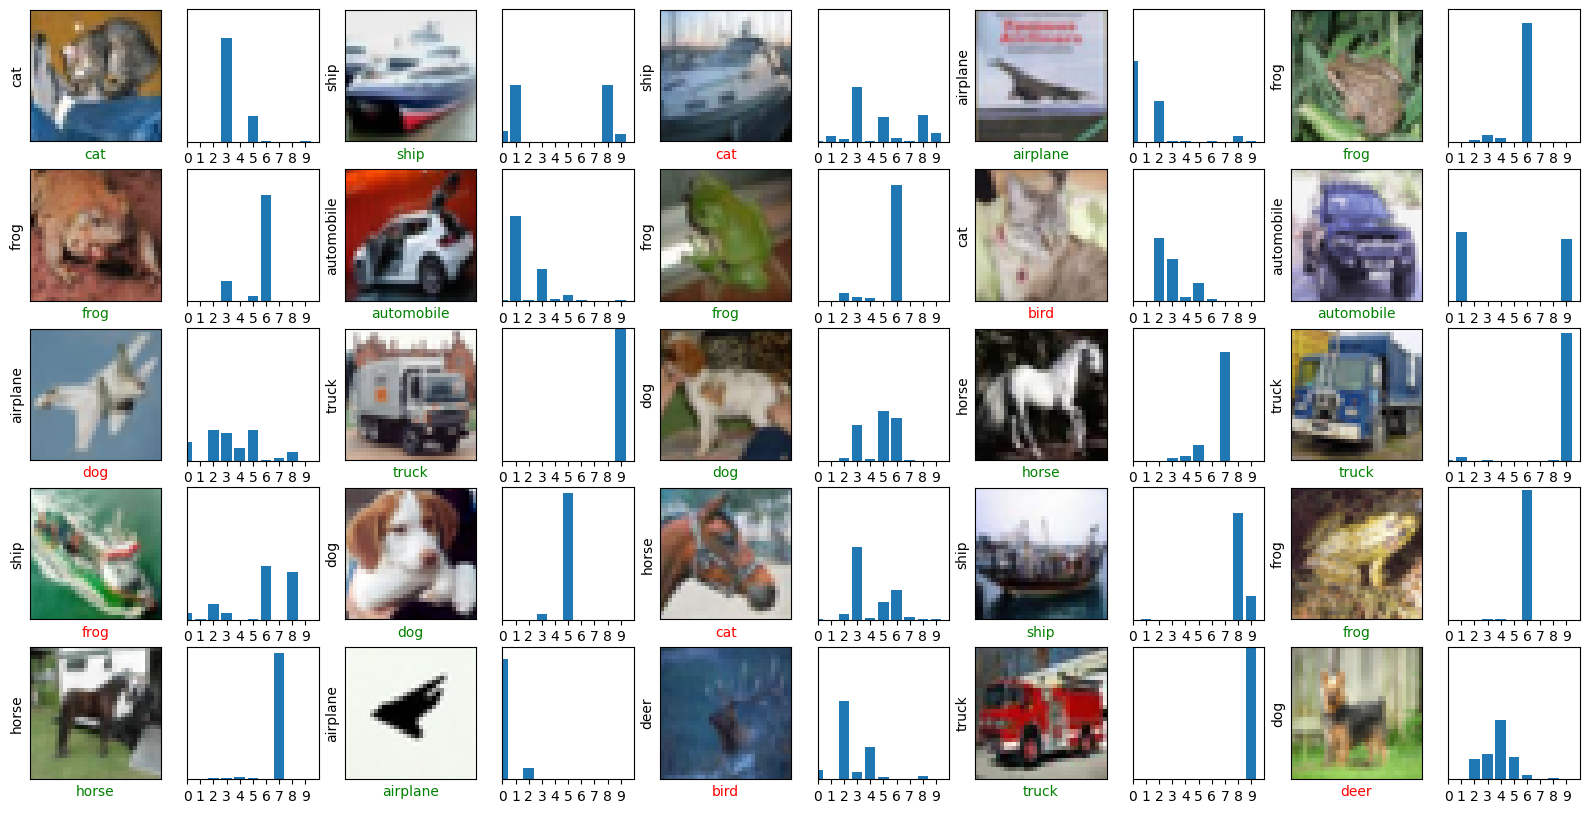

In [101]:
rows = 5
cols = 5

plt.figure(figsize=(20,10))
for i in range(25):

    plt.subplot(rows, 2*cols, 2*i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    if Y_test[i][0] == np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])], color='g')
    else:
        plt.xlabel(class_names[np.argmax(predictions[i])], color='r')


    plt.subplot(rows, 2*cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.yticks([])
    plt.xticks(range(0,10))
    plt.ylim([0,1])
    plt.xlim([0,10])

plt.show()

In [102]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1_l2

model_2 = keras.Sequential([
    ## input layer
    keras.Input(shape=(32, 32, 3)),

    ## hidden layers with L1_L2 regularization
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),

    ## hidden layer with L1_L2 regularization
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])

model_2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_51 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_52 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                     

In [103]:
model_2.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.0005, momentum=0.8),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [104]:
h = model_2.fit(x=X_train, y=Y_train, epochs=5, validation_data = (X_test, Y_test) , batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 11s 6ms/step - loss: 3.9012 - accuracy: 0.3856 - val_loss: 3.6831 - val_accuracy: 0.4141
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 3.3299 - accuracy: 0.5057 - val_loss: 3.2599 - val_accuracy: 0.4778
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 2.9758 - accuracy: 0.5575 - val_loss: 3.0019 - val_accuracy: 0.5040
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 2.6760 - accuracy: 0.5920 - val_loss: 2.7177 - val_accuracy: 0.5363
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 2.4108 - accuracy: 0.6208 - val_loss: 2.4931 - val_accuracy: 0.5565


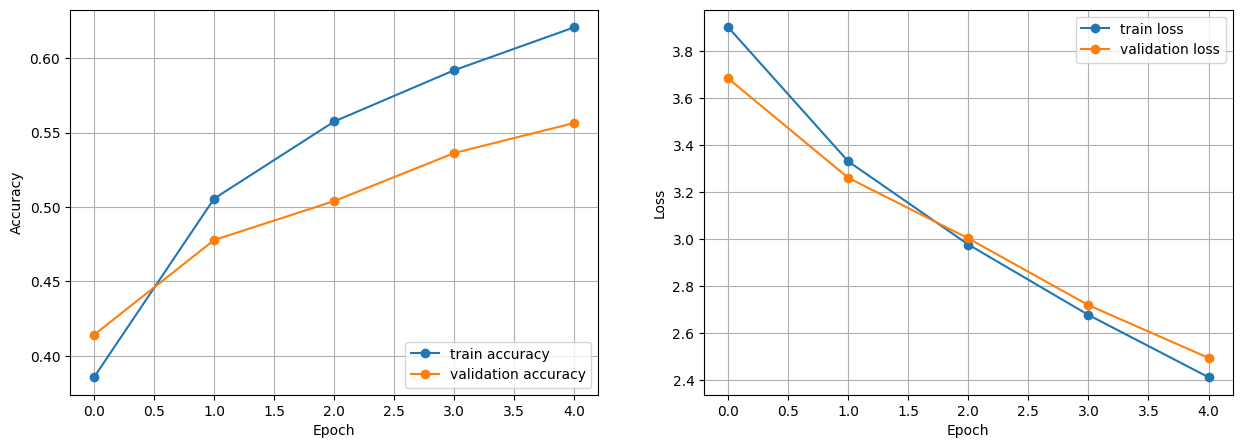

In [105]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [117]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1_l2

model_3 = keras.Sequential([
    ## input layer
    keras.Input(shape=(32, 32, 3)),

    ## hidden layers with L1_L2 regularization
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),

    ## hidden layer with L1_L2 regularization
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])

model_3.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_57 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_58 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                     

In [118]:
model_3.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0005,momentum=0.8),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [119]:
h = model_3.fit(x=X_train, y=Y_train, epochs=5, validation_data = (X_test, Y_test) , batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 14s 6ms/step - loss: 2.2322 - accuracy: 0.4600 - val_loss: 2.8569 - val_accuracy: 0.3136
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6681 - accuracy: 0.5671 - val_loss: 2.7977 - val_accuracy: 0.3308
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5285 - accuracy: 0.6054 - val_loss: 1.6649 - val_accuracy: 0.5645
Epoch 4/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4680 - accuracy: 0.6249 - val_loss: 1.8161 - val_accuracy: 0.5238
Epoch 5/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4312 - accuracy: 0.6381 - val_loss: 1.5343 - val_accuracy: 0.6109


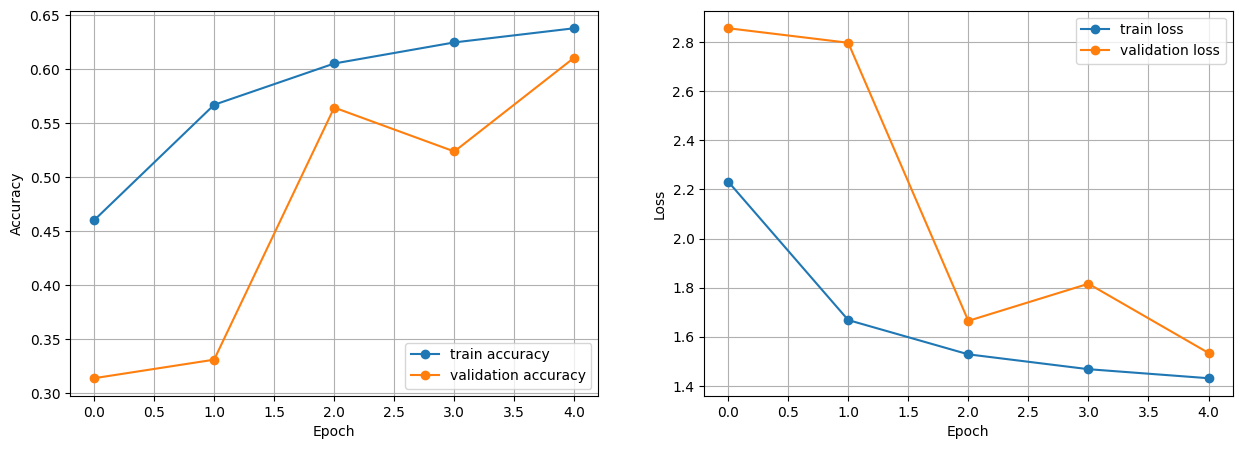

In [120]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()